In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder


In [ ]:
data = pd.read_csv('/content/_rnek_Veri_Seti_-_MANOVA.csv')

In [ ]:
data


,Öğrenme Grubu,Ortalama Bakış Süresi (sn),Bakış Sayısı,AOI Süresi (sn),Bakış Hızı (bakış/sn)
0,İşitsel,1.947693,26.037396,12.768131,2.399265
1,Görsel,2.261429,28.218436,11.740586,2.316127
2,İşitsel,1.776870,32.524936,7.865116,2.422123
3,İşitsel,1.739779,34.328776,11.821760,2.049057
4,İşitsel,1.504296,23.998518,9.391061,2.426277
...,...,...,...,...,...
95,Görsel,2.126784,27.370474,10.690287,2.770264
96,Görsel,1.594971,35.143078,15.646341,3.165150
97,Görsel,2.037291,20.099493,14.146636,2.400494
98,Görsel,1.867643,18.483088,11.420078,2.995297


In [ ]:
data['Ortalama Bakış Süresi (sn)'] = np.log(data['Ortalama Bakış Süresi (sn)'])
data['Bakış Sayısı'] = np.log(data['Bakış Sayısı'])
data['AOI Süresi (sn)'] = np.log(data['AOI Süresi (sn)'])
data['Bakış Hızı (bakış/sn)'] = np.log(data['Bakış Hızı (bakış/sn)'])
data

,Öğrenme Grubu,Ortalama Bakış Süresi (sn),Bakış Sayısı,AOI Süresi (sn),Bakış Hızı (bakış/sn)
0,1,0.666646,3.259534,2.546952,0.875162
1,0,0.815997,3.339976,2.463052,0.839896
2,1,0.574854,3.482007,2.062437,0.884644
3,1,0.553758,3.535984,2.469942,0.717380
4,1,0.408325,3.177992,2.239758,0.886358
...,...,...,...,...,...
95,0,0.754611,3.309465,2.369336,1.018943
96,0,0.466856,3.559428,2.750237,1.152200
97,0,0.711621,3.000695,2.649477,0.875674
98,0,0.624677,2.916856,2.435373,1.097043


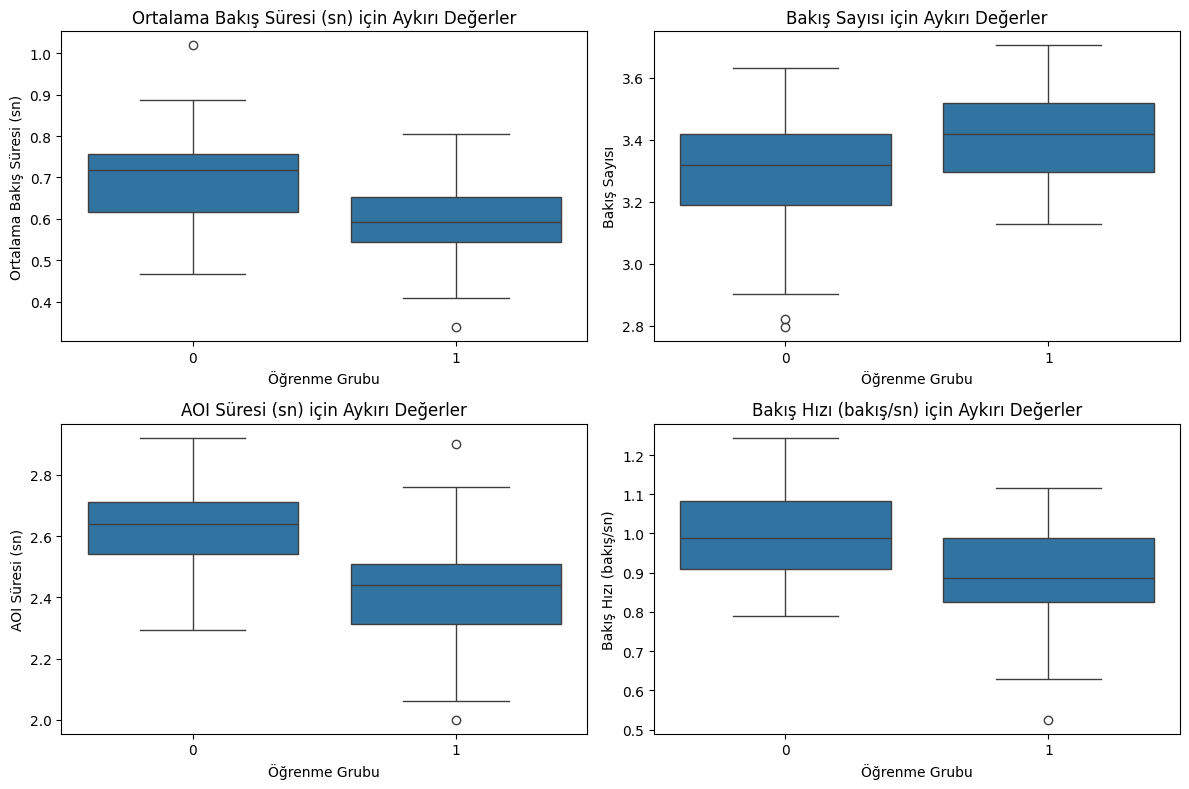

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Grafik boyutları
plt.figure(figsize=(12, 8))

# Her bir bağımlı değişken için kutu grafikleri
for i, col in enumerate(['Ortalama Bakış Süresi (sn)', 'Bakış Sayısı', 'AOI Süresi (sn)', 'Bakış Hızı (bakış/sn)'], 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=data, x='Öğrenme Grubu', y=col)
    plt.title(f'{col} için Aykırı Değerler')

plt.tight_layout()
plt.show()

In [ ]:
from scipy.stats import zscore

# Her bağımlı değişken için ayrı z-skorları hesaplama
data[['Z_Ortalama Bakış Süresi', 'Z_Bakış Sayısı', 'Z_AOI Süresi', 'Z_Bakış Hızı']] = data[['Ortalama Bakış Süresi (sn)', 'Bakış Sayısı', 'AOI Süresi (sn)', 'Bakış Hızı (bakış/sn)']].apply(zscore)

# Z-skoru 3'ten büyük olanları aykırı kabul etme
outliers = data[(data[['Z_Ortalama Bakış Süresi', 'Z_Bakış Sayısı', 'Z_AOI Süresi', 'Z_Bakış Hızı']] > 3).any(axis=1)]


In [ ]:
outliers

,Öğrenme Grubu,Ortalama Bakış Süresi (sn),Bakış Sayısı,AOI Süresi (sn),Bakış Hızı (bakış/sn),Z_Ortalama Bakış Süresi,Z_Bakış Sayısı,Z_AOI Süresi,Z_Bakış Hızı
69,0,1.019045,3.386835,2.832748,0.888557,3.307376,0.240213,1.616389,-0.481182


In [ ]:
# Kategorik değişkenleri sayısal hale getirme
label_encoder = LabelEncoder()
data['Öğrenme Grubu'] = label_encoder.fit_transform(data['Öğrenme Grubu']) #işitsel : 1, görsel: 0
data


,Öğrenme Grubu,Ortalama Bakış Süresi (sn),Bakış Sayısı,AOI Süresi (sn),Bakış Hızı (bakış/sn),Z_Ortalama Bakış Süresi,Z_Bakış Sayısı,Z_AOI Süresi,Z_Bakış Hızı
0,1,0.666646,3.259534,2.546952,0.875162,0.143184,-0.458628,0.080288,-0.586487
1,0,0.815997,3.339976,2.463052,0.839896,1.484208,-0.017028,-0.370663,-0.863742
2,1,0.574854,3.482007,2.062437,0.884644,-0.681019,0.762680,-2.523895,-0.511941
3,1,0.553758,3.535984,2.469942,0.717380,-0.870434,1.058996,-0.333629,-1.826947
4,1,0.408325,3.177992,2.239758,0.886358,-2.176283,-0.906267,-1.570826,-0.498468
...,...,...,...,...,...,...,...,...,...
95,0,0.754611,3.309465,2.369336,1.018943,0.933024,-0.184523,-0.874371,0.543891
96,0,0.466856,3.559428,2.750237,1.152200,-1.650731,1.187695,1.172908,1.591540
97,0,0.711621,3.000695,2.649477,0.875674,0.547016,-1.879574,0.631340,-0.582460
98,0,0.624677,2.916856,2.435373,1.097043,-0.233653,-2.339821,-0.519431,1.157904


In [ ]:
# Bağımsız değişkenlerin modeldeki etkisini incelemek için lojistik regresyon
X = data[['Ortalama Bakış Süresi (sn)',	'Bakış Sayısı',	'AOI Süresi (sn)',	'Bakış Hızı (bakış/sn)']]
X = sm.add_constant(X)  # Sabit terim ekleme
y = data['Öğrenme Grubu']

In [ ]:
# Lojistik regresyon modeli kurma
model = sm.Logit(y, X)
result = model.fit()


Optimization terminated successfully.
         Current function value: 0.296473
         Iterations 8


In [ ]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:          Öğrenme Grubu   No. Observations:                  100
Model:                          Logit   Df Residuals:                       95
Method:                           MLE   Df Model:                            4
Date:                Wed, 06 Nov 2024   Pseudo R-squ.:                  0.5678
Time:                        11:04:51   Log-Likelihood:                -29.647
converged:                       True   LL-Null:                       -68.593
Covariance Type:            nonrobust   LLR p-value:                 4.871e-16
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         29.4762     10.752      2.741      0.006       8.403      50.550
Ortalama Bakış Süresi (sn)   -17.4196      4.539     -3.838      0.000     -26.316 

Üstteki tablodan anladık ki bakış hızı ve sayısının anlamlı bir etkisi yok. bu sebeple, ileri de kurulacak makine öğrenmesi modelinde kayda alınmasına gerek yoktur.


In [ ]:
# Sabit terim ve katsayıları alma
params = result.params
intercept = params['const']
coefficients = params.drop('const')

# Model formülünü gösterme, logaritmik dönüşümlü bağımsız değişkenler ile
formula = f"log-odds = {intercept:.3f} "
for var, coef in coefficients.items():
    formula += f"+ ({coef:.3f} * ln({var})) "
print("Model Formülü:", formula.strip())

Model Formülü: log-odds = 29.476 + (-17.420 * ln(Ortalama Bakış Süresi (sn))) + (4.491 * ln(Bakış Sayısı)) + (-11.600 * ln(AOI Süresi (sn))) + (-4.661 * ln(Bakış Hızı (bakış/sn)))
